# Une analyse qui fleure bon les années 50

## Introduction

Cette étude de cas est extraite de l'ouvrage de Jean-Pierre Benzécri
"Analyse des données. Tome 2 : l'analyse des correspondances". Il
s'agit d'une étude réelle dont nous avons complété les
objectifs. 

## But

Une enquête a été effectuée auprès de cent fumeurs afin de choisir les
noms de deux nouvelles marques de cigarettes. La première marque est
destinée à une clientèle masculine : L'homme ciblé est un connaisseur
distingué, raffiné mais viril, de niveau socio-économique élevé. La
seconde symbolise un public féminin, élégant, assuré, dynamique.

## Les donées

Douze marques ont été retenues :
- Orly (Orl)
- Alezan (Ale)
- Corsaire (Cor)
- Directoire (Dir)
- Ducat (Duc)
- Fontenoy (Fon)
- Icare (Ica)
- Zodiac (Zod)
- Pavois (Pav)
- Cocker (Coc)
- Escale (Esc)
- Hôtesse (Hot)

Pour évaluer leur image auprès du public, onze attributs ont été
proposés aux fumeurs :
- vieillot - désuet (VD)
- nouveau riche (NR)
- sobre, élégant (SE)
- cocasse - ridicule (CR)
- racé (RA)
- mièvre (MI)
- distingué (DI)
- vulgaire - commun (VC)
- pour un homme (HO)
- pour une femme (FE)
- pour une petite nature (PN)

On a demandé à chacun des cent fumeurs d'associer une ou plusieurs
parques qui selon eux conviennent le mieux.
Le tableau de données est disponible dans le fichier "fume.txt".

In [2]:
import pandas

In [3]:
fume = pandas.read_csv("fume.txt", delim_whitespace=True)

In [4]:
fume

,Orl,Ale,Cor,Dir,Duc,Fon,Ica,Zod,Pav,Coc,Esc,Hot
VD,1,2,14,38,18,10,9,5,9,4,0,1
NR,20,9,1,11,10,9,1,1,20,9,7,12
SE,9,23,1,15,7,11,6,2,7,12,3,17
CR,1,3,15,15,6,5,12,18,4,25,2,2
RA,4,33,7,8,3,6,6,4,5,15,5,3
MI,3,9,1,7,7,5,12,9,6,9,6,13
DI,11,9,1,17,4,21,6,1,5,4,5,27
VC,4,4,32,2,6,0,9,7,3,10,12,7
HO,9,12,23,4,7,13,5,5,10,5,13,9
FE,9,3,9,8,4,2,6,8,1,6,23,33


## Analyse

### Quelles sont les marques les plus citées ? Attributs ?

In [5]:
fume.sum().sort_values(ascending=False)

Dir    132
Hot    129
Coc    123
Ale    112
Cor    106
Esc     86
Fon     84
Duc     83
Pav     79
Orl     78
Ica     78
Zod     71
dtype: int64

In [6]:
fume.sum(axis=1).sort_values(ascending=False)

HO    115
SE    113
FE    112
VD    111
DI    111
NR    110
CR    108
RA     99
PN     99
VC     96
MI     87
dtype: int64

- Attributs en commun : "SE", "RA" et "DI".
- On propose des attributs qui ne leur correspondent pas pour ne garder que les marques ayant des aspects positifs.

## Regarder la correlation entre les marques. Quelles sont les marques dont les correlations sont les plus faibles ? Les plus élevées ? Comment interpréter ces résultats ?

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
current_palette = sns.color_palette()

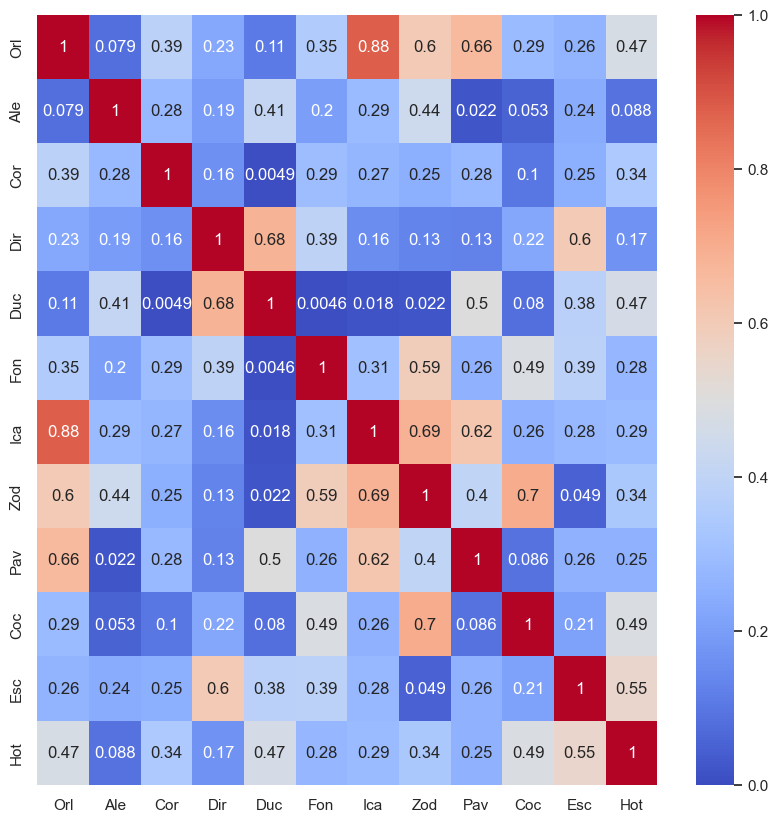

In [8]:
data = fume.corr().applymap(abs)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data, 
            annot=True, 
            cmap='coolwarm',
            vmin=0, vmax=1)
plt.show()

## Les publics visés ont-ils des points communs ? Quels sont les attributs correspondants  Pourquoi a-t-on proposé des attributs ne leur correspondant pas ?

* Attributs en commun : `SE`, `RA` et `DI`
* On propose des attributs qui ne leur correspondent pas pour ne garder que les marques ayant des aspects positifs

## Regarder la correlation entre les attributs. Quelles sont les marques dont les correlations sont les plus faibles ? Les plus élevées ? Comment interpréter ces résultats ?

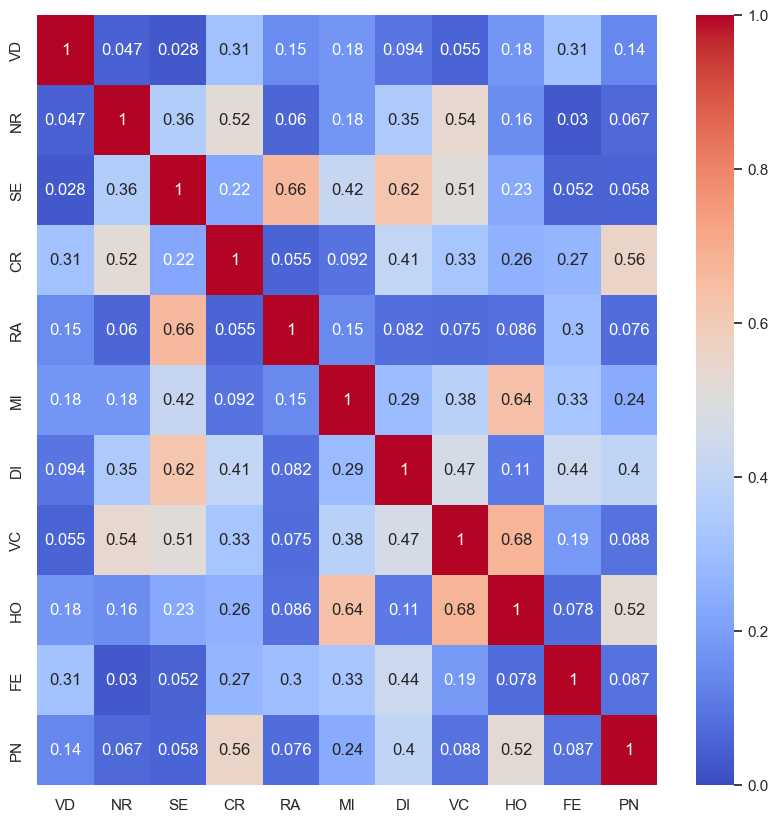

In [9]:
data = fume.transpose().corr().applymap(abs)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data, 
            annot=True, 
            cmap='coolwarm',
            vmin=0, vmax=1)
plt.show()

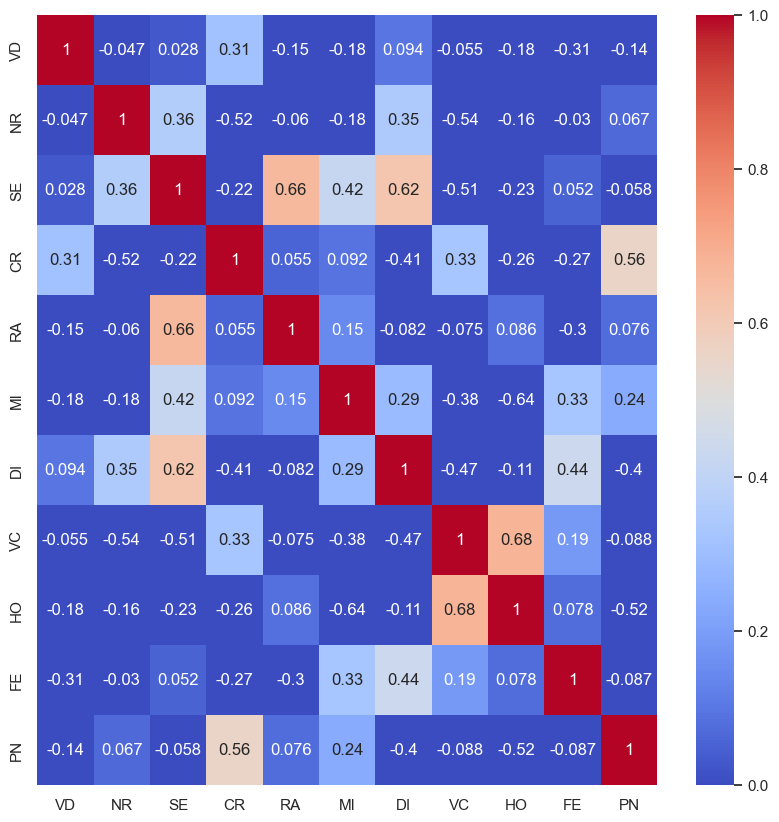

In [10]:
data = fume.transpose().corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data, 
            annot=True, 
            cmap='coolwarm',
            vmin=0, vmax=1)
plt.show()

* `HO`corrélé avec `VC` (en positif) et `MI` (en négatif) : attention lors des interprétations ! On veut juste une marque pour un homme pas pour un plouc (il faudra trouver des axes qui séparent ces deux attributs)
* `FE`très peu corrélé avec `NR`

## En examinant les valeurs propres et leur diagramme, déterminer les axes principaux qu'il faut garder dans les analyses.

Attention, nous voulons expliquer les marques par rapports aux attributs. Nos données sont donc les marques. Il faut transposer le tableau de données.

In [11]:
fume.transpose()

,VD,NR,SE,CR,RA,MI,DI,VC,HO,FE,PN
Orl,1,20,9,1,4,3,11,4,9,9,7
Ale,2,9,23,3,33,9,9,4,12,3,5
Cor,14,1,1,15,7,1,1,32,23,9,2
Dir,38,11,15,15,8,7,17,2,4,8,7
Duc,18,10,7,6,3,7,4,6,7,4,11
Fon,10,9,11,5,6,5,21,0,13,2,2
Ica,9,1,6,12,6,12,6,9,5,6,6
Zod,5,1,2,18,4,9,1,7,5,8,11
Pav,9,20,7,4,5,6,5,3,10,1,9
Coc,4,9,12,25,15,9,4,10,5,6,24


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = pandas.DataFrame(scaler.fit_transform(fume.transpose()),
                     columns=fume.transpose().columns, 
                     index=fume.transpose().index)

In [13]:
from sklearn.decomposition import PCA 
import numpy as np

pca = PCA() 
pca.fit(X)

U = np.transpose(pca.components_) # vecteurs propres
I = pandas.DataFrame(np.transpose(pca.explained_variance_ratio_), columns=["pourcentage"])  # information véhiculée

C = pandas.DataFrame(X @ U, index=X.index) # nouvelles coordonnées

corrélations = pandas.DataFrame([[C[facteur].corr(X[column]) for facteur in C] for column in X], index=X.columns)
cos2 = (C**2).div((X**2).sum(axis=1), axis='index')

In [14]:
I

,pourcentage
0,0.281815
1,0.216518
2,0.147206
3,0.135890
4,0.112328
5,0.060082
6,0.024615
7,0.012238
8,0.006466
9,0.002472


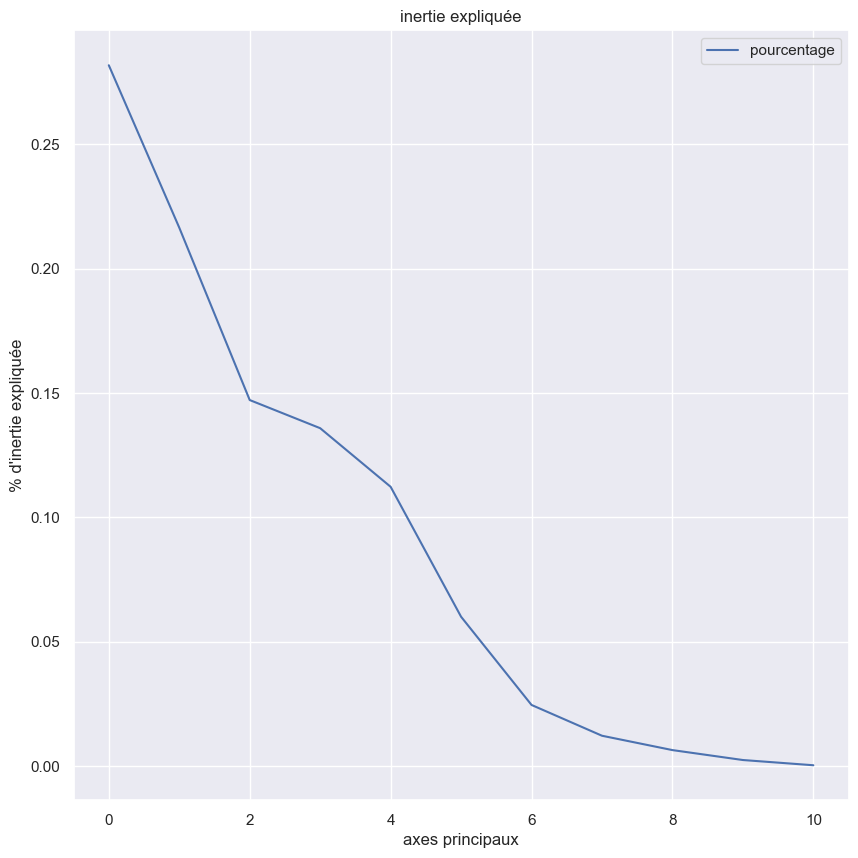

In [15]:
fig, ax = plt.subplots(figsize=(10, 10)) 

I.plot(ax=ax)

plt.title("inertie expliquée")
plt.xlabel("axes principaux")
plt.ylabel("% d'inertie expliquée")

plt.show()

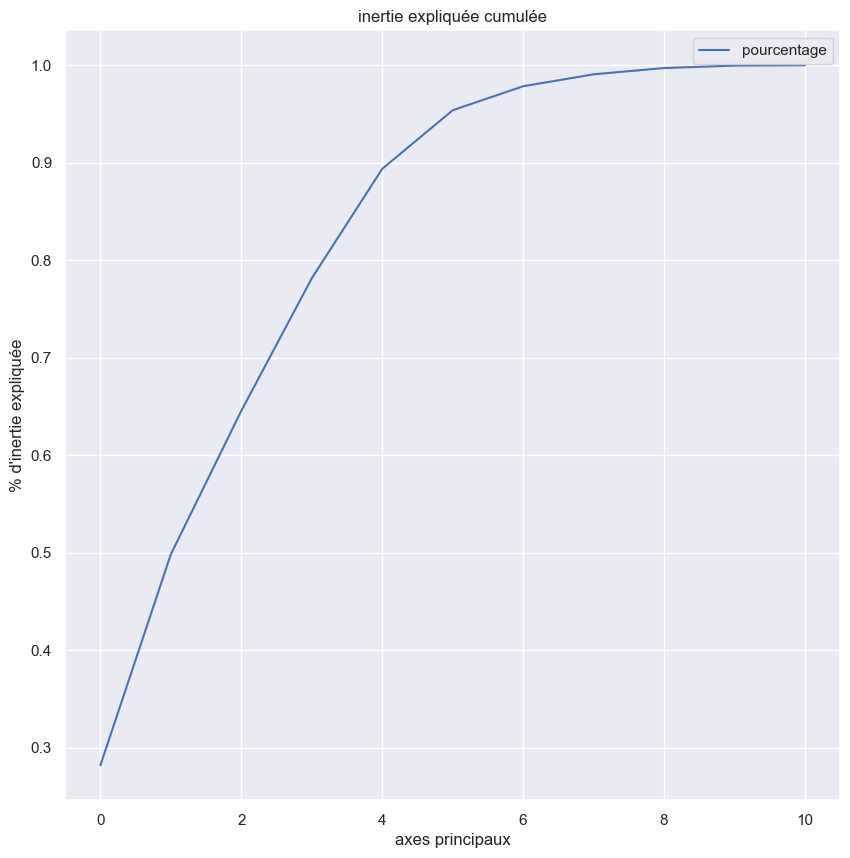

In [16]:
fig, ax = plt.subplots(figsize=(10, 10)) 

I.cumsum().plot(ax=ax)

plt.title("inertie expliquée cumulée")
plt.xlabel("axes principaux")
plt.ylabel("% d'inertie expliquée")

plt.show()

On garde tous les axes avant la "chute" de l'inertie expliquée (le gain d'un nouvel axe ne fait plus gagner grand chose) ou lorsque le pourcentage d'inertie expliquée est suffisant. Ici 5 axes nous permettent d'expliquer plus de 90% des données et l'axe 5 correspond à une chute d'inertie expliquée.

## Interprétation

### Les axes

In [18]:
corrélations.transpose()[0:5]

,VD,NR,SE,CR,RA,MI,DI,VC,HO,FE,PN
0,0.057250,-0.570981,-0.811641,0.450600,-0.220311,-0.549207,-0.744696,0.833452,0.519415,-0.195945,0.036019
1,0.175383,-0.236248,0.029883,0.753412,0.194595,0.453851,-0.387819,-0.209197,-0.733708,-0.358291,0.788596
2,-0.416621,-0.335261,-0.234134,0.032224,-0.434906,0.542660,0.156959,0.215845,-0.146526,0.825775,0.138616
3,-0.446116,-0.356889,0.444407,0.046055,0.838747,0.230406,-0.090434,0.286699,0.343384,0.053258,-0.032853
4,0.703851,-0.483484,0.184435,0.291779,-0.012233,0.170711,0.377642,0.122745,-0.004066,0.051147,-0.444622


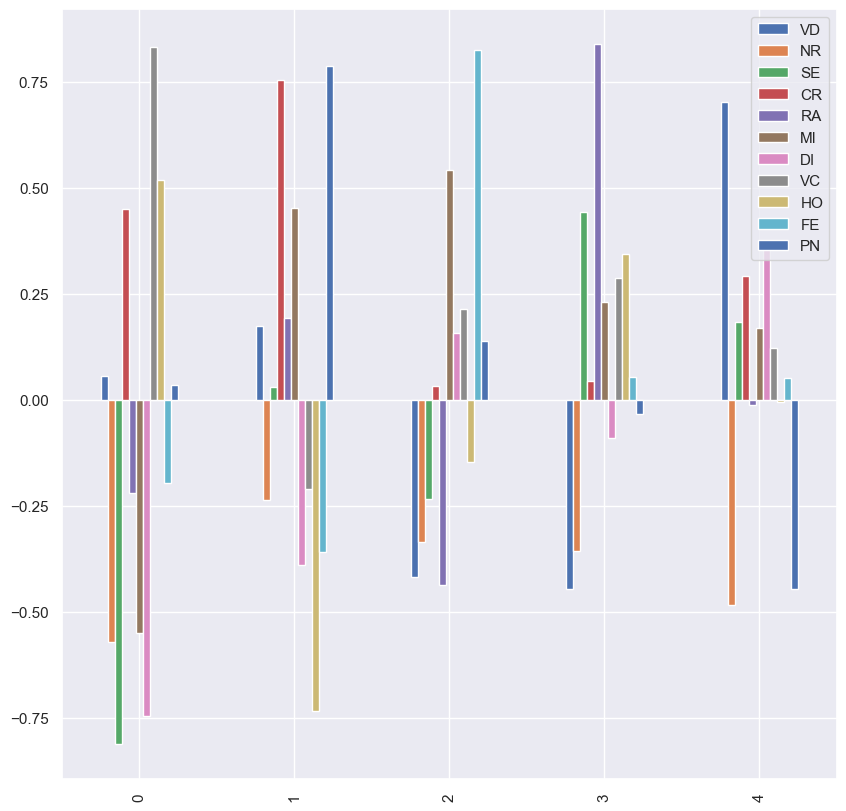

In [19]:
fig, ax = plt.subplots(figsize=(10, 10)) 

corrélations.transpose()[0:5].plot.bar(ax=ax)

plt.show()

In [20]:
I.iloc[:5]

,pourcentage
0,0.281815
1,0.216518
2,0.147206
3,0.135890
4,0.112328


- composante 0 : 28% de l'inertie. Oppose vulgaire-commun (`VC`) à sobre-éléguant (`SE`), distingué (`DI`) même si avec une petite tendance nouveau riche (`NR`). Nos marques cibles sont à gauche de l'axe 0
- composante 1 : 21% de l'inertie. Oppose petite nature (`PN`) et cocasse-ridicule (`CR`) à Homme (`HO`). Axe de virilité (rappelez vous que c'est les années 50) : axe de *virilité* ?
- composante 2 : 14 % de l'inertie. Les Femmes (`FE`) (a gauche). *Opposition homme/femme* ?
- composante 3 : 13% de l'inertie. Racé (`RA`) (à droite)
- composante 4 : 11% de l'inertie. vieillot-désuet (`VD`) (à droite)

### Qualité de la projection

In [21]:
cos2[list(range(5))]

,0,1,2,3,4
Orl,0.075753,0.260133,0.063644,0.152561,0.379845
Ale,0.189279,0.001682,0.164728,0.619567,0.000730
Cor,0.768923,0.139021,0.004828,0.027372,0.037014
Dir,0.129852,0.074531,0.111214,0.149605,0.445233
Duc,0.022101,0.126273,0.075744,0.472164,0.009516
Fon,0.106585,0.310228,0.151409,0.028494,0.066718
Ica,0.024137,0.241067,0.165052,0.001653,0.119860
Zod,0.229073,0.432846,0.147110,0.014392,0.000263
Pav,0.020589,0.016649,0.256657,0.235650,0.363378
Coc,0.006396,0.727819,0.003306,0.048263,0.058365


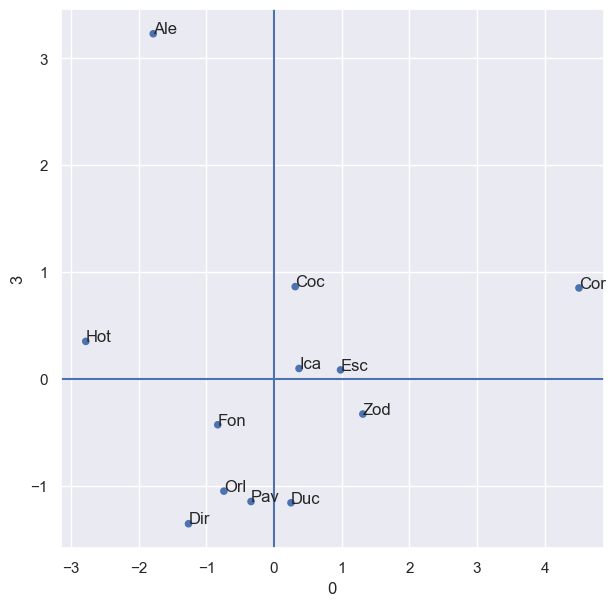

In [25]:
axe_x = 0
axe_y = 3

couleurs = [sns.color_palette()[0]] * len(C)

fig, ax = plt.subplots(figsize=(7, 7)) 

draw = C.plot.scatter(axe_x, axe_y, color=couleurs , ax=ax)

for index, row in C.iterrows():
    draw.annotate(str(index), (row[axe_x], row[axe_y]))
    
plt.axvline(0)
plt.axhline(0)

plt.show() 

Nos marques cible sont à gauche. Le deuxième axe (raçé) est plus typé homme.

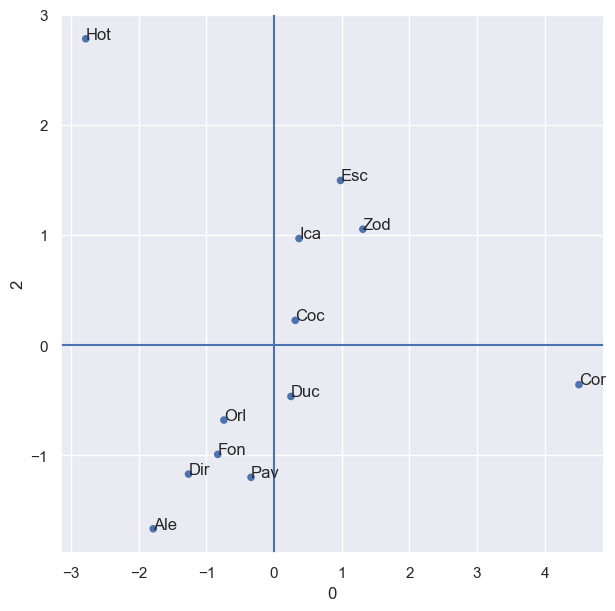

In [26]:
axe_x = 0
axe_y = 2

couleurs = [sns.color_palette()[0]] * len(C)

fig, ax = plt.subplots(figsize=(7, 7)) 

draw = C.plot.scatter(axe_x, axe_y, color=couleurs , ax=ax)

for index, row in C.iterrows():
    draw.annotate(str(index), (row[axe_x], row[axe_y]))
    
plt.axvline(0)
plt.axhline(0)

plt.show() 

Hotesse est très typé femme et Alezan typé Homme. Nos choix se portent là dessus.

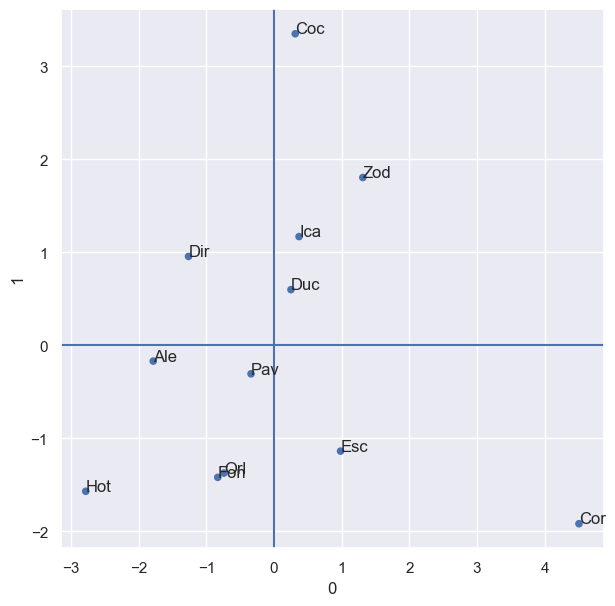

In [27]:
axe_x = 0
axe_y = 1

couleurs = [sns.color_palette()[0]] * len(C)

fig, ax = plt.subplots(figsize=(7, 7)) 

draw = C.plot.scatter(axe_x, axe_y, color=couleurs , ax=ax)

for index, row in C.iterrows():
    draw.annotate(str(index), (row[axe_x], row[axe_y]))
    
plt.axvline(0)
plt.axhline(0)

plt.show()

Directoire n'est pas très viril alors qu'Hotesse, oui.

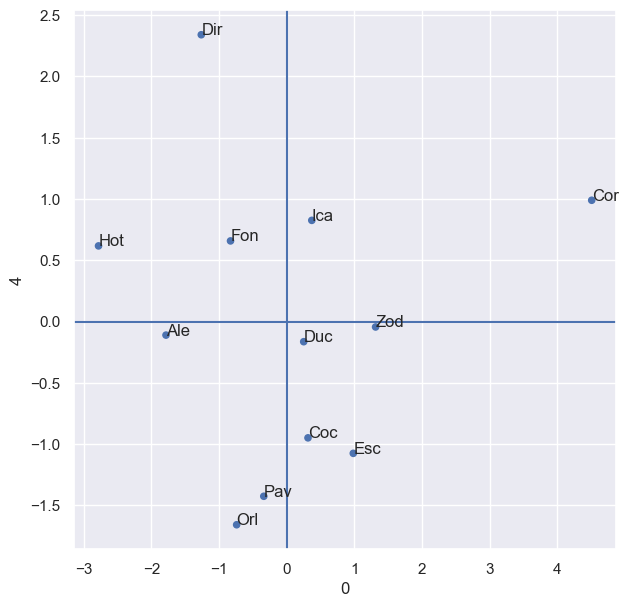

In [28]:
axe_x = 0
axe_y = 4

couleurs = [sns.color_palette()[0]] * len(C)

fig, ax = plt.subplots(figsize=(7, 7)) 

draw = C.plot.scatter(axe_x, axe_y, color=couleurs , ax=ax)

for index, row in C.iterrows():
    draw.annotate(str(index), (row[axe_x], row[axe_y]))
    
plt.axvline(0)
plt.axhline(0)

plt.show() 

Alezan se projette mal sur l'axe 4, mais pavois et Orly font très nouveau riche.